<a href="https://colab.research.google.com/github/I-jidd/Data-Analysis/blob/main/NeuralNet_with_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


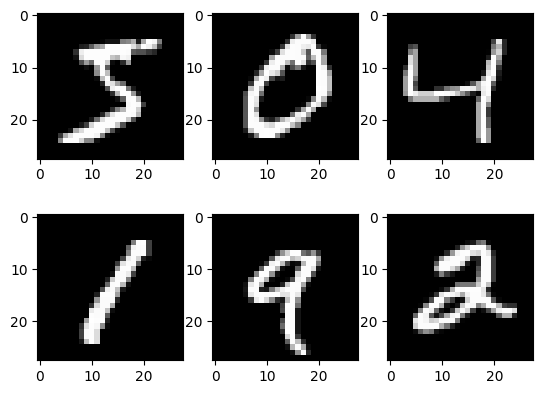

In [ ]:
#normalize the data: 0, 255 -> 0,1
x_train, x_test = x_train / 255.0, x_test/ 255.0

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(x_train[i], cmap='gray')
plt.show()

In [ ]:
#model
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

None


In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = keras.optimizers.Adam(0.001)

model1.compile(loss = loss, optimizer=optim, metrics=["accuracy"])

batch_size = 64

epochs = 5

model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)


Epoch 1/5
938/938 - 6s - 6ms/step - accuracy: 0.1116 - loss: 2.3015
Epoch 2/5
938/938 - 6s - 7ms/step - accuracy: 0.1124 - loss: 2.3011
Epoch 3/5
938/938 - 9s - 10ms/step - accuracy: 0.1124 - loss: 2.3006
Epoch 4/5
938/938 - 9s - 10ms/step - accuracy: 0.1124 - loss: 2.2996
Epoch 5/5
938/938 - 7s - 7ms/step - accuracy: 0.1157 - loss: 2.2974


In [ ]:
#evaluate
model1.evaluate(x_test, y_test, batch_size=batch_size, verbose = 2)


157/157 - 1s - 4ms/step - accuracy: 0.1135 - loss: 2.2952


[2.295187473297119, 0.11349999904632568]

In [ ]:
probability_model = keras.models.Sequential([
    model1,
    keras.layers.Softmax()
])

predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[0.09966692 0.11165103 0.10006427 0.10233235 0.09808778 0.09159368
 0.09773172 0.10333847 0.0975967  0.09793708], shape=(10,), dtype=float32)
1


In [ ]:
predictions = model1.predict(x_test, batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

pred05s = predictions[0:5]
print(pred05s.shape)
label05s= np.argmax(pred05s, axis=1)
print(label05s)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
tf.Tensor(
[0.09966692 0.11165103 0.10006427 0.10233235 0.09808778 0.09159368
 0.09773172 0.10333847 0.0975967  0.09793708], shape=(10,), dtype=float32)
1
(5, 10)
[1 1 1 1 1]
